In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import ttest_ind


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/socr-mlb/baseball_players.csv


In [2]:
#I want to know if first basemen height is generally greater than second basemen's
#I am going to pull a dataset of baseball players and get a random sample of the population
#Do a descriptive analysis
#Real-life data mostly leans towards normal distribution, however I am going use whiskerbox to see if there is any attribute that constitutes this i.e outliers
# Perform a confidence interval and scientifically prove the hypothesis that first basemen are taller than second basemen through student test
#The test will indicate how well the sample represents the population dataset, possibly use it on a model if needs be

In [3]:
#Pulling of the dataset
df = pd.read_csv("/kaggle/input/socr-mlb/baseball_players.csv")
df

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


In [4]:
#Getting an idea of what the Height looks like
print(list(df['Height(inches)'])[:20])

[74, 74, 72, 72, 73, 69, 69, 71, 76, 71, 73, 73, 74, 74, 69, 70, 72, 73, 75, 78]


In [5]:
#Let us get to explore the description of the data
mean = df['Height(inches)'].mean() #average
std = df['Height(inches)'].std()   # how much is the dataset away from the average?
var = df['Height(inches)'].var()   # how does the dataset differ 

print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 73.6972920696325
Variance = 5.316798081118074
Standard Deviation = 2.3058183105175645


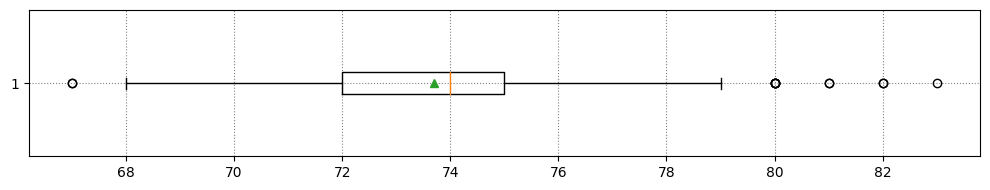

In [6]:
#Check if there are any outliers, this will well constitute the kind of distribution the dataset symbolises
plt.figure(figsize=(10,2))
plt.boxplot(df['Height(inches)'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

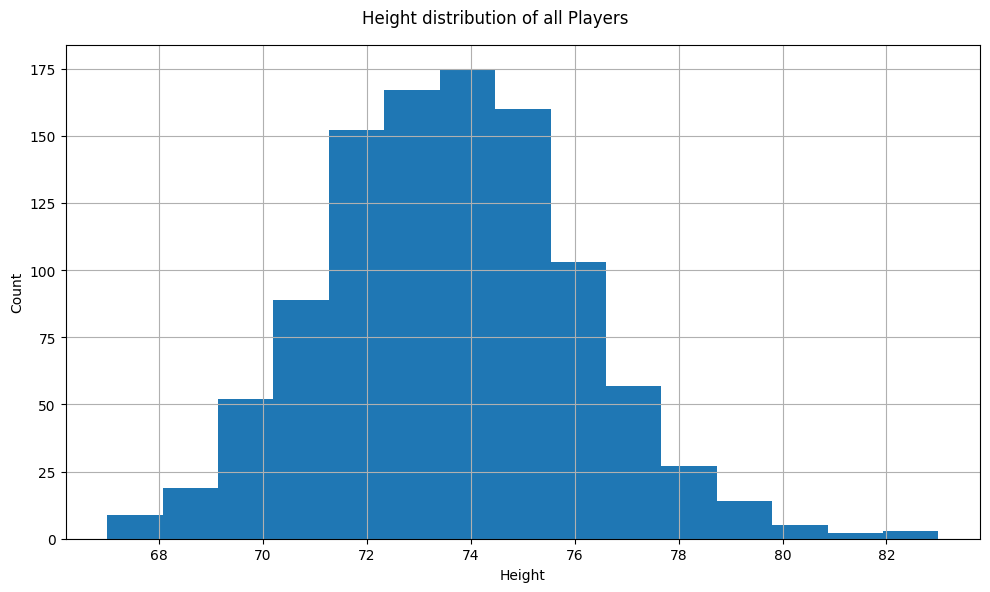

In [7]:
#Since we have outliers, I am visualizing the data in a histogram plot to get an overview of how the dataset is sitting
df['Height(inches)'].hist(bins=15, figsize=(10,6))
plt.suptitle('Height distribution of all Players')
plt.xlabel('Height')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [8]:
# The histogram above indicates that the dataset is of normal distribution

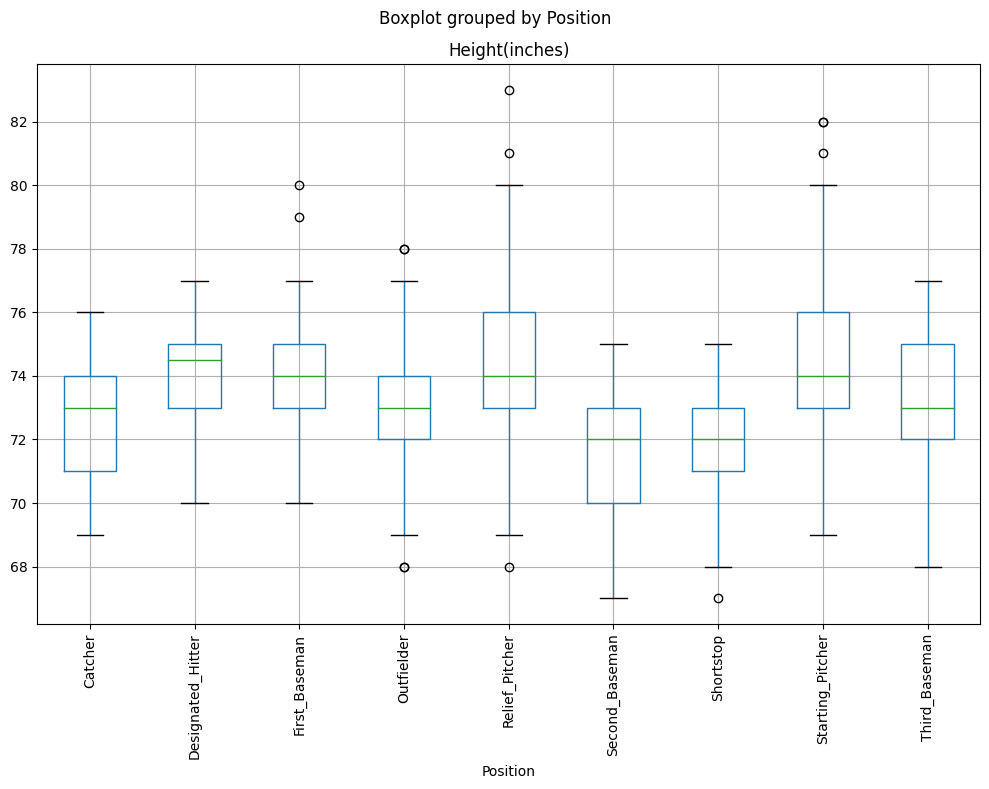

In [9]:
#What do the heights look like in comparison terms as per whiskerbox?
df.boxplot(column='Height(inches)', by='Position', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [10]:
# As per the whiskerboxes above,first basemen are taller than second basemen, however tight evidence is still needed.
# Now that I have proved that the data is normally distributed, I am going to use synthetic data by generating a random sample of about 500 lines that follows normal distribution using the height mean and standard deviation this will be a good way of having a population representation
HeightSampleGen = np.random.normal(mean,std,500) 

HeightSampleGen[:20]

array([75.70568276, 70.59200076, 74.42381834, 76.56791309, 75.27756128,
       74.78845139, 72.63581334, 73.47603888, 72.27071309, 75.57232823,
       76.00961809, 76.48057577, 72.34979411, 74.54534392, 73.66513288,
       71.248076  , 71.28268944, 73.51257884, 72.39084471, 74.44132154])

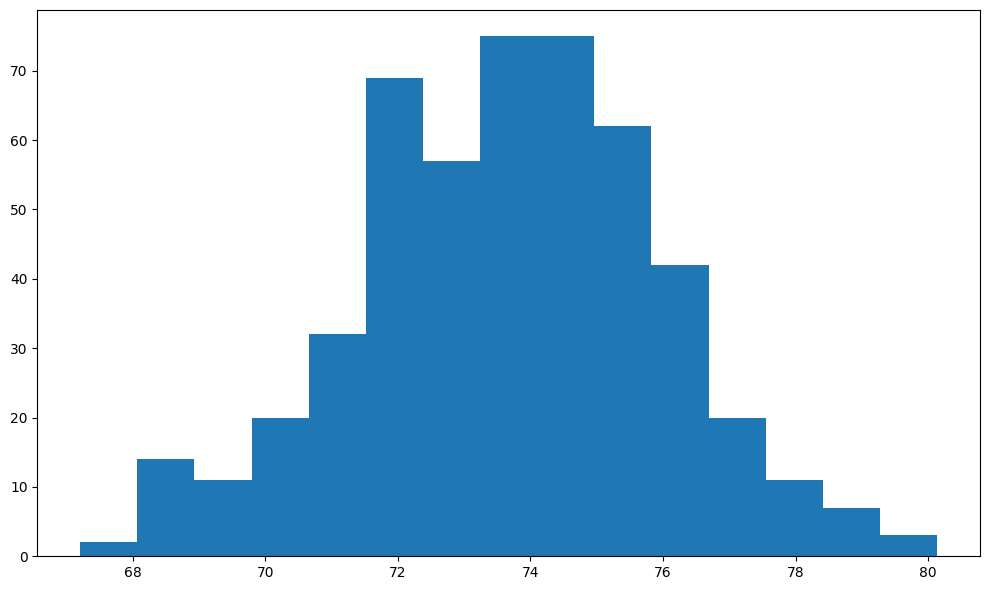

In [11]:
# Sanity' sake, let us see how the synthetic data is distributed
plt.figure(figsize=(10,6))
plt.hist(HeightSampleGen, bins=15)
plt.tight_layout()
plt.show()


In [12]:
#It seems to be normally distributed as expected

In [13]:
#We are going to us the synthetic dataset to test our confidence interval program
#How well does this sample represent the population?
#I need to do a confidence interval calculation in order to determine that

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data) # converting the dataset to a float type
    n = len(a) # getting the length of the dataset
    m, se = np.mean(a), scipy.stats.sem(a) #calcu lating the mean and standard error
    h = se * scipy.stats.t.ppf((1 + confidence)/ 2., n-1) #calculating the confidence interval
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(HeightSampleGen,p)
    print(f"p={p:.2f}, mean = {m:.2f} +-{h:.2f}")

p=0.85, mean = 73.67 +-0.15
p=0.90, mean = 73.67 +-0.17
p=0.95, mean = 73.67 +-0.20


In [14]:
#Okay, now let us use the original dataset to test our hypothesis that first basemen are taller than second basemen 
#Hypothesis testing
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Position']=='First_Baseman',['Height(inches)']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Position']=='Second_Baseman',['Height(inches)']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 73.62..74.38, 2nd basemen height: 71.04..71.69
Conf=0.90, 1st basemen height: 73.56..74.44, 2nd basemen height: 70.99..71.73
Conf=0.95, 1st basemen height: 73.47..74.53, 2nd basemen height: 70.92..71.81


In [15]:
#It so seems that the intervals do not overlap

In [16]:
#Hypothesis testing using student t-test just to have water tight evidence
tval, pval = ttest_ind(df.loc[df['Position']=='First_Baseman',['Height(inches)']], df.loc[df['Position']=='Second_Baseman',['Height(inches)']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 7.65
P-value: 9.137321189738959e-12


In [17]:
#P-value shows how little the probabilities of having the same mean are, this proves that the two positions differ which can only prove the prevailing status of null hypothesis
#t-value shows the difference between the normalised mean values
#Thus proves that the heights are different as a whole and the first basemen are taller than second basemen

In [18]:
#Out of curiosity, what is the relationship between height and weight?

In [19]:
#my first execution revealed that there was missing data in Weights(pounds) variable, this was solved by using fillna() method to fill in the gaps
print(f"Covariance matrix:\n{np.cov(df['Height(inches)'], df['Weight(pounds)'].ffill())}")
print(f"Covariance = {np.cov(df['Height(inches)'], df['Weight(pounds)'].ffill())[0,1]}")
print(f"Correlation = {np.corrcoef(df['Height(inches)'], df['Weight(pounds)'].ffill())[0,1]}")

Covariance matrix:
[[  5.31679808  25.66247208]
 [ 25.66247208 441.63557066]]
Covariance = 25.66247207715972
Correlation = 0.5295919602903908


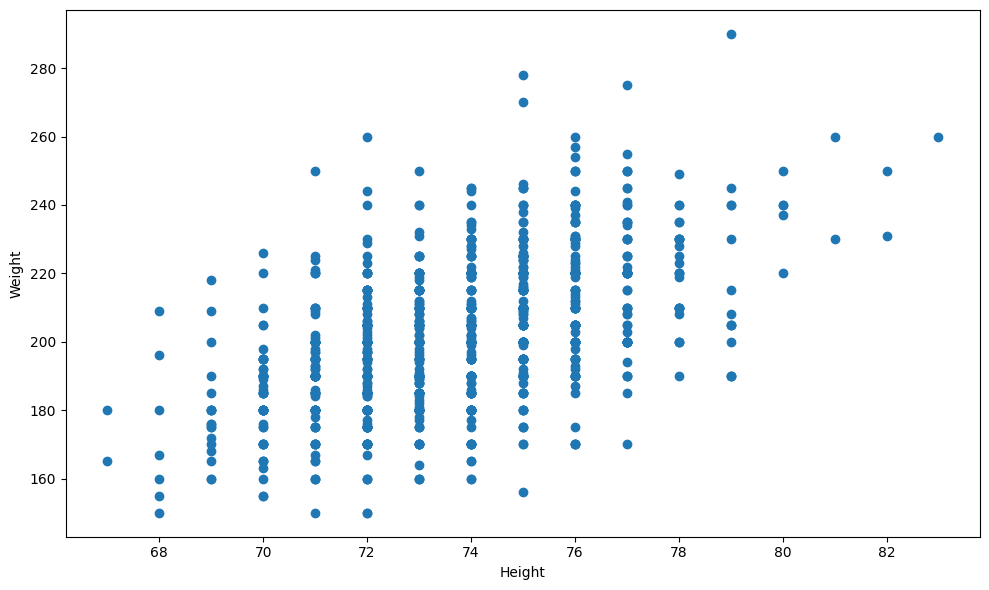

In [20]:
# As much as we might have a positive relationship, we do not have a much stronger correlation 
#Let us visualise the relationship

plt.figure(figsize=(10,6))
plt.scatter(df['Height(inches)'],df['Weight(pounds)'].ffill())
plt.xlabel('Height')
plt.ylabel('Weight')
plt.tight_layout()
plt.show()